In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:

# Load the training dataset
train_data = pd.read_csv('fraudTrain.csv')

# Load the testing dataset
test_data = pd.read_csv('fraudTest.csv')

# Inspect the first few rows of each dataset
#print("Training Data:")
#print(train_data.head())
#print("\nTesting Data:")
#print(test_data.head())
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [39]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [40]:
train_data.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [41]:
test_data.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [42]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [43]:
train_data.head(3)

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0


In [44]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [45]:
test_data.head(3)

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0


In [46]:
# Separate features and target variable from the training dataset
x_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

# Separate features and target variable from the testing dataset
x_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Handle the imbalanced dataset using SMOTE (only on the training data)
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features (using training data for fit and both datasets for transform)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296675, 13), (555719, 13), (1296675,), (555719,))

# Logistic Regression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_train,y_train), log_reg.score(x_test, y_test)

(0.9942113482561166, 0.9961401355721147)

0.0


<Axes: >

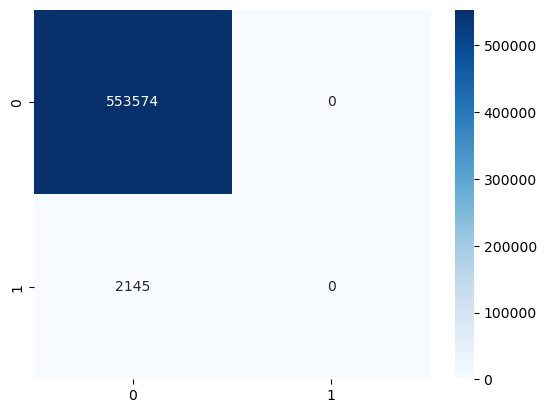

In [49]:
cf = confusion_matrix(y_test, log_reg.predict(x_test))
print(f1_score(y_test, log_reg.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [51]:
log_reg_pred = log_reg.predict(x_test)

In [53]:
print("Classification Report :\n", classification_report(y_test, log_reg_pred, digits=4))

C:\Users\niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report :
               precision    recall  f1-score   support

           0     0.9961    1.0000    0.9981    553574
           1     0.0000    0.0000    0.0000      2145

    accuracy                         0.9961    555719
   macro avg     0.4981    0.5000    0.4990    555719
weighted avg     0.9923    0.9961    0.9942    555719



C:\Users\niraj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree

In [31]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_test, y_test)

(0.9968920508222955, 0.997495136930715)

0.66164316966456


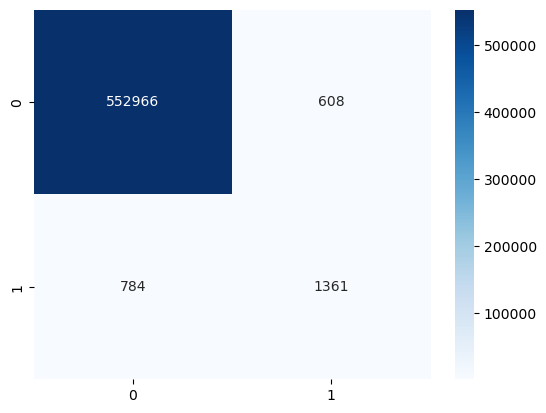

In [54]:
cf = confusion_matrix(y_test, dtc.predict(x_test))
print(f1_score(y_test, dtc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")
dtc_pred = dtc.predict(x_test)

In [55]:
print("Classification Report :\n", classification_report(y_test, dtc_pred, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.9986    0.9989    0.9987    553574
           1     0.6912    0.6345    0.6616      2145

    accuracy                         0.9975    555719
   macro avg     0.8449    0.8167    0.8302    555719
weighted avg     0.9974    0.9975    0.9974    555719



# Random Forest

In [56]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.9998781498833555, 0.9970740608113093)

0.4768339768339769


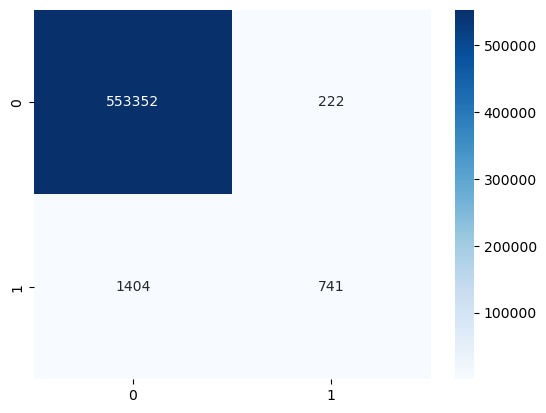

In [57]:
cf = confusion_matrix(y_test, rfc.predict(x_test))
print(f1_score(y_test, rfc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")
rfc_pred = rfc.predict(x_test)

In [58]:
print("Classification Report :\n", classification_report(y_test, rfc_pred, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.9975    0.9996    0.9985    553574
           1     0.7695    0.3455    0.4768      2145

    accuracy                         0.9971    555719
   macro avg     0.8835    0.6725    0.7377    555719
weighted avg     0.9966    0.9971    0.9965    555719

